# Introduction
On June 21, 2019, a fire and explosion, see \cref{fig:fire}, occurred at the Girard Point Refinery owned by Philadelphia Energy Solutions \cite{Renshaw2019}.  One of the three explosions observed that day was from the V1 treater-feed-surge-drum in the refineries pretreatment unit.  The explosion propelled the drum approximately 1,996.6 ft from the blast seat, see \cref{fig:tank}.  It is hypothesized that a boiling-liquid expanding-vapor explosion (BLEVE) event provided the energy to generate the blast wave.  The Philadelphia Fire Department requested ATF estimate the blast overpressure generated when the tank exploded.  This paper is an engineering analysis to estimate the blast overpressure assuming a BLEVE occurred.  The analysis is based upon an adiabatic and isentropic energy analysis developed by the Center for Chemical Process Safety \cite{Safety2010}. 

![A massive fire burns at Philadelphia Energy Solutions Inc's oil refinery \cite{Maykuth2019}.](report_images/fig_refinery_fire.png){#fig:fire width=75% placement='H'}

![Largest portion of the tank that was propelled 1,996.6 ft from the blast seat \cite{Malone2019}.](report_images/1_fish_fillet1.jpg){#fig:tank width=75% placement='H'}
 

# Background

## Refinery

The Girard Point Refinery is located in southwest Philadelphia, PA, on the Schuylkill River, see \cref{fig:map}.  The refinery produced approximately 335,000 bpd of gasoline, and was the largest on the East Coast \cite{AssociatedPress2019}.  The treater-feed-surge-drum, involved in the explosion, is part of the pretreatment process of alkylation used in the production of gasoline. 

![Map of Girard Point Refinery show the blast location \cite{Duchneskie2019}.](report_images/fig_map_girard.jpeg){#fig:map width=75% placement='H'}

## Treater Feed Surge Tank

Alkylaition generally converts propylene $(C_3H_6)$, butylene $(C_4H_8)$, pentene $(C_5H_{10})$, and isobutane $(C_3H_{10})$ to alkane liquids such as isoheptane $(C_7H_{16})$ and isooctane $(C_8H_{16})$.  These Alkylates are a highly valued component in the production of gasoline because of there high octane and low vapor pressure \cite{flowserve2000}.  The treater-feed-surge-drum (TFSD) was located between the fluid catalytic cracker and the alkylaition unit. Surge drums stabilize fluctuations in the flow rate.  The TFSD was part of the pretreatment process for alkylation, see \cref{fig:fig_process_flow}.  During pretreatment, also referred to as sweetening, sulfur compounds (hydrogen sulfide, thiophene and mercaptan) are removed to improve color, odor, and oxidation stability.

![Simple flow diagram of the sweetening and treating process where the TFSD was located at the time of the explosion. \cite{Temur2014,Malone2019}](report_images/fig_process_flow.jpeg){#fig:fig_process_flow width=75% placement='H'}

The TFSD tank measured 39'-8" in length, not including the heads, see \cref{tbl:tbl_tank} and \cref{fig:fig_tank} for construction details \cite{PES2019}. At the time of the explosion, the TFSD contained 98,874 lb of butane (50% by volume) and butene (40% by volume) and other lesser constituients, see \cref{tbl:tbl_chemicals_in_tank}.

Parameter             Value              Units
--------              --------           --------
Type                  horizontal         NA
Year Built            1972               NA
Construction Material A516 Type 70 Steel NA
Tank Wall Thickness   0.8125             in
Volume                372228             gal
Working Pressure      155                psi
Maximum Temperature   650                $^{\circ}F$
Test Pressure         295                psi
Safety Valve          3"x4" 4136         Set at 155 psig

Table: Treater-Feed-Surge-Drum Construction Parameters \cite{PES2019} {#tbl:tbl_tank align=rll widths=[0.25,0.25,0.25]}

![Diagram depicting the dimensions of the TFSD tank.  The tank was positioned 25 ft above ground level and estimated to contain 20,160 gal (480 bbl) of butane (50% by volume) and butene (40% by volume) at the time of the explosion.\cite{PES2019}](report_images/fig_tank.jpeg){#fig:fig_tank width=75% placement='H'}

Chemical  Percent by Volume
--------  --------
methane     0.01
ethylene    0.00
ethane      0.01
propane     0.90
propylene   0.10
isobutane  37.28
nbutane    12.81
butens     40.41
neopentane  0.00
isopentane  3.94
npentane    0.25
butadiene   0.33
benzene     0.00
C5 olefins  3.54
C6 sats     0.33
C7+         0.04

Table: Sample of Chemical Contents in the Treater-Feed-Surge-Drum Closest to the Time of the Explosion \cite{PES2019} {#tbl:tbl_chemicals_in_tank align=rr widths=[0.2,0.2]}

## Pressure Relief Valve

The TFSD was fitted with a Consolidated (1906-30LC-1-CC-MS-31-RF-1) 3" x 4" pressure relief valve (PRV).  The relief pressure was set to 155 psig and the relief temperature was set to 183.5 $^\circ F$.  The PRV was positioned on the top of the TRFD, see \cref{fig:fig_tank}.


## Boiling-Liquid Expanding-Vapor Explosion (BLEVE)

A BLEVE results from the sudden failure of a tank containing a compressed vapor (head space) and a super-heated liquid (a liquid heated above it's boiling point but without boiling). The magnitude of the blast depends on how super-heated the liquid was at failure.  As the level of super-heat rises, the portion of liquid that flash-boils rises, thus increasing the energy released.  Once containment failure occurs the energy is distributed into four forms:

1. Overpressure wave
2. Kinetic energy of fragments
3. Deformation and failure of the containment material
4. Heat transferred to environment

The distribution of the energy into the these four forms depends on the specifics of the explosion.  Planas-Cuchi et al. found that a *fragile* failure releases 80% of the energy into the blastwave, while a *ductile* failure releases 40% of the energy into the blastwave.  The remaining energy becomes kinetic energy of the fragments.  The heat transfer to the environment is relatively small \cite{Planas2004}.  In practice most pressure vessels are designed with materials that are ductile rather than brittle to avoid sudden and catastrophic brittle (fragile) failures \cite{Benac2016}.

# Notebook Imports

In [96]:
# Data manipulation
import pandas as pd
import numpy as np
from scipy.interpolate import griddata

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import matplotlib.pyplot as plt
h = 8
w = h*1.61803398875
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)

#from matplotlib import rc
plt.rc('font',**{'family':'serif','serif':['Times New Roman']})
plt.rc('text', usetex=True)

# Thermodynamics
import CoolProp

# Publish
from ipypublish.scripts import nb_setup

# Thermodynamic Data
## Pressure at State 1 (Pre-failure State)
The drum (tank) is assumed to fail at $1.21$ times the opening pressure of the pressure relief valve (PRV)\cite{Engineers2013}.  The PRV was set to open at $15\:MPa$ therefore, the absolute pressure at state 1 (failure state) is given by,

$$p_1 = 1.21\left(p_{PRV}+p_{atm}\right)$$
$$p_1 = 1.21\left(1500000+101325\right)$$
$$p_1 = 1.916\:MPa$$

## Pressure at State 2 (Final Expanded State)
The pressure at state 2 (final expanded state) is standard atmospheric pressure or $0.101\:MPa$.  The other state variables can be determined based on the "saturated" state of the propane inside the tank and the known pressures.  The thermodynamic data for states 1 and 2 is summarized in Table (\cref{tbl:thermo}).

In [75]:
p_relief = 1500000 #Pa
p_atm = 101325 #Pa 
p_1 = 1.21*(p_relief + p_atm) # Pa absolute
p_2  = 101325; # atmospheric pressure
V_1 = 25 #m^3
Pct_f = 0.8 # percent fluid in the tank
Pct_g = 1 - Pct_f # percent vapor in the tank
R = 100 # range where overpressure is needed.
a0 = 340 #m/s speed of sound in air at STP

In [76]:
from CoolProp.CoolProp import PropsSI
s_g1 = PropsSI('S','P',p_1,'Q',1,'Propane')/1000;
s_f1 = PropsSI('S','P',p_1,'Q',0,'Propane')/1000; 
v_g1 = 1/PropsSI('D','P',p_1,'Q',1,'Propane'); 
v_f1 = 1/PropsSI('D','P',p_1,'Q',0,'Propane'); 
h_g1 = PropsSI('H','P',p_1,'Q',1,'Propane'); 
h_f1 = PropsSI('H','P',p_1,'Q',0,'Propane');
u_g1 = (h_g1 - p_1*(v_g1))/1000;
u_f1 = (h_f1 - p_1*(v_f1))/1000;


s_g2 = PropsSI('S','P',p_2,'Q',1,'Propane')/1000; 
s_f2 = PropsSI('S','P',p_2,'Q',0,'Propane')/1000; 
v_g2 = 1/PropsSI('D','P',p_2,'Q',1,'Propane'); 
v_f2 = 1/PropsSI('D','P',p_2,'Q',0,'Propane'); 
h_g2 = PropsSI('H','P',p_2,'Q',1,'Propane'); 
h_f2 = PropsSI('H','P',p_2,'Q',0,'Propane');
u_f2 = (h_f2 - p_2*(v_f2))/1000;
u_g2 = (h_g2 - p_2*(v_g2))/1000;

# Define a dictionary containing the study data
verify_data = {'State': [1, 2],
               '$P \\left(kPa\\right)$': [p_1/1000, p_2/1000],
               '$h_f \\left(\\frac{kJ}{kg}\\right)$': [h_f1, h_f2],
               r'$h_g \left(\frac{kJ}{kg}\right)$': [h_g1, h_g2],
               r'$v_f \left(\frac{m^3}{kg}\right)$': [v_f1, v_f2],
               r'$v_g \left(\frac{m^3}{kg}\right)$': [v_g1, v_g2],
               r'$u_f \left(\frac{kJ}{kg\:K}\right)$': [u_f1, u_f2],
               r'$u_g \left(\frac{kJ}{kg\:K}\right)$': [u_g1, u_g2],
               r'$s_f \left(\frac{kJ}{kg\:K}\right)$': [s_f1, s_f2],
               r'$s_g \left(\frac{kJ}{kg\:K}\right)$': [s_g1, s_g2],
               }
# Convert the dictionary into DataFrame
pd = nb_setup.setup_pandas(escape_latex=False)
df = pd.DataFrame(verify_data)
df.set_index('State', inplace=True)
df

,$P \left(kPa\right)$,$h_f \left(\frac{kJ}{kg}\right)$,$h_g \left(\frac{kJ}{kg}\right)$,$v_f \left(\frac{m^3}{kg}\right)$,$v_g \left(\frac{m^3}{kg}\right)$,$u_f \left(\frac{kJ}{kg\:K}\right)$,$u_g \left(\frac{kJ}{kg\:K}\right)$,$s_f \left(\frac{kJ}{kg\:K}\right)$,$s_g \left(\frac{kJ}{kg\:K}\right)$
State,,,,,,,,,
1,1937.60325,354584.413136,625197.730383,0.002287,0.022459,350.152477,581.681515,1.503188,2.325970
2,101.32500,100356.292970,525947.893053,0.001722,0.413884,100.181860,484.011098,0.607045,2.449144


# Internal Energy at States 1 and 2
## Internal Energy at State 1
The internal energy at at state 1 (saturated) is calculated from,

$$h = u + pv$$

where $h$ is the enthalpy, $p$ is the pressure, and $v$ is the specific volume.  Therefore, for state 1 (fluid and gas) we have,

$$u = h - pv$$


$$u_{1f} = h_{1f} - p_1v_{1f}$$
$$u_{1f} = 354584.4 - (1937.603\:kPa)(0.002287\:m^3/kg)$$
$$u_{1f} = 350.15\:kJ/kg$$


$$u_{1g} = h_{1g} - p_1v_{1g}$$
$$u_{1g} = 100356.29 - (101.325\:kPa)(0.001722\:m^3/kg)$$
$$u_{1g} = 581.68\:kJ/kg$$

and similarly for state 2,

$$u_{2f} = 100.18\:kJ/kg$$
$$u_{2g} = 484.01\:kJ/kg$$

In [77]:
Xf = (s_f1 - s_f2)/(s_g2-s_f2)
Xg = (s_g2 - s_g1)/(s_g2-s_f2)
print("The quality of the saturated liquid at state 2 is %8.3f" % (Xf))
print("The quality of the saturated vapor at state 2 is %8.3f" % (Xg))

The quality of the saturated liquid at state 2 is    0.486
The quality of the saturated vapor at state 2 is    0.067


In [78]:
u_2_fluid = (1-Xf)*u_f2 + Xf*u_g2
u_2_vapor = (1-Xg)*u_g2 + Xg*u_f2
print("The internal energy at state 2 of the saturated liquid is %8.3f kJ/kg" % (u_2_fluid))
print("The internal energy at state 2 of the satureated vapor is %8.3f kJ/kg" % (u_2_vapor))

The internal energy at state 2 of the saturated liquid is  286.907 kJ/kg
The internal energy at state 2 of the satureated vapor is  458.346 kJ/kg


## Internal Energy at State 2
When the drum breaks and the propane at state 1 expands to state 2 (atmospheric pressure) some of the liquid propane vaporizes and some of the gaseous propane condenses. Therefore unlike at the saturated state 1, there is both vapor and fluid present.  We can calculate the vapor present using the vapor quality $(\chi)$, from,

$$\chi = \frac{\nu_{tot} - \nu_f}{\nu_g-\nu_f}$$

where $\nu$ is the specific gravity.  This equation is also true for the entropy $(s)$, internal energy $(u)$, and enthalpy $(h)$.  Using the entropy $(s)$ we can calculate the quality of the saturated liquid and vapor as the propane transitions from state 1 to state 2.  Therefore, the liquid vapor quality at state 2 is given by s

$$\chi_f = \frac{s_{f1} - s_{f2}}{s_{g2}-s_{f2}}$$

$$\chi_f = \frac{1.503188 - 0.607045}{2.449144-0.607045}$$

$$\chi_f = 0.4865$$

and for the vapor at state 2,

$$\chi_g = \frac{s_{g2} - s_{g1}}{s_{g2}-s_{f2}}$$

$$\chi_g= \frac{2.449144 - 2.325970}{2.449144-0.607045}$$

$$\chi_g = 0.06687$$

We can then calculate the internal energy at state 2 using,

$$u_{2-fluid} = (1-\chi_f)u_{f2} + \chi_f u_{g2}$$
$$u_{2-vapor} = (1-\chi_g)u_{g2} + \chi_g u_{f2}$$

$$u_{2-fluid} = (1-0.4865)100.1818 + (0.4865)(484.0111)$$
$$u_{2-vapor} = (1-0.0668)484.0111 + (0.0668)(100.1818)$$

$$u_{2-fluid} = 286.9068\:kJ/kg$$
$$u_{2-vapor} = 458.3459\:kJ/kg$$

In [79]:
e_exf = u_f1 - u_2_fluid
e_exg = u_g1 - u_2_vapor

print("The specific work done by the saturated liquid in expansion from state 1 to state 2 is %8.2f kJ/kg" % (e_exf))
print("The specific work done by the saturated vapor in expansion from state 1 to state 2 is %8.2f kJ/kg" % (e_exg))

The specific work done by the saturated liquid in expansion from state 1 to state 2 is    63.25 kJ/kg
The specific work done by the saturated vapor in expansion from state 1 to state 2 is   123.34 kJ/kg


# The Specific Work
The work that the expanding vapor and fluid can perform is the difference between the initial (1) and final (2) states,

$$e_{ex} = u_1 - u_2$$

for the saturated fluid we have,

$$e_{exf} = u_{f1} - u_{2-fluid}$$
$$e_{exf} = 350.15 - 286.91$$
$$e_{exf} = 63.25\:kJ/kg$$

and for the vapor,

$$e_{exg} = u_{g1} - u_{2-vapor}$$
$$e_{exg} = 581.68 - 458.35$$
$$e_{exg} = 123.34\:kJ/kg$$

In [80]:
m_f1 = Pct_f*V_1/v_f1 # mass of fluid at state 1 (kg)
m_g1 = Pct_g*V_1/v_g1 # mass of gas at state 1 (kg)
print("The mass of the fluid at state 1 is %8.2f kg" % (m_f1))
print("The mass of the vapor at state 1 is %8.2f kg" % (m_g1))
E_exf = 2*e_exf*m_f1 # explosion energy of fluid on the ground (factor of 2) at state 1 (kJ)
E_exg = 2*e_exg*m_g1 # explosion energy of gas on the ground at state 1 (kJ)
print("The explosion energy of the fluid at state 1 is %8.2f kJ." % (E_exf))
print("The explosion energy of the vapor at state 1 is %8.2f kJ." % (E_exg))
E_extot = E_exf+E_exg # total explosion energy on the ground at state 1
print("The total energy of the surface explosion is Ex_tot = %8.2f kJ." % (E_extot))

The mass of the fluid at state 1 is  8743.82 kg
The mass of the vapor at state 1 is   222.63 kg
The explosion energy of the fluid at state 1 is 1106018.04 kJ.
The explosion energy of the vapor at state 1 is 54916.44 kJ.
The total energy of the surface explosion is Ex_tot = 1160934.48 kJ.


# The Explosion Energy
The explosion energy is calcu

In [81]:
R_bar = R*(101325/1156.1e6)**(1/3)
print("The non-dimensional range of the receptor is %8.2f" % (R_bar))
print("The non-dimensional tank pressure p/po is %8.2f" % (p_1/p_atm))

The non-dimensional range of the receptor is     4.44
The non-dimensional tank pressure p/po is    19.12


In [82]:
pr5 = pd.read_csv('bleve_overpressure_curves/p1_p0_5.csv'); pr5['z'] = r'$p/p_0=5.0$'; pr5['w'] = 5.0
pr10 = pd.read_csv('bleve_overpressure_curves/p1_p0_10.csv'); pr10['z'] = r'$p/p_0=10.0$'; pr10['w'] = 10.0
pr20 = pd.read_csv('bleve_overpressure_curves/p1_p0_20.csv'); pr20['z'] = r'$p/p_0=20.0$'; pr20['w'] = 20.0
pr50 = pd.read_csv('bleve_overpressure_curves/p1_p0_50.csv'); pr50['z'] = r'$p/p_0=50.0$'; pr50['w'] = 50.0
pr100 = pd.read_csv('bleve_overpressure_curves/p1_p0_100.csv'); pr100['z'] = r'$p/p_0=100.0$'; pr100['w'] = 100.0
pr200 = pd.read_csv('bleve_overpressure_curves/p1_p0_200.csv'); pr200['z'] = r'$p/p_0=200.0$'; pr200['w'] = 200.0
pr500 = pd.read_csv('bleve_overpressure_curves/p1_p0_500.csv'); pr500['z'] = r'$p/p_0=500.0$'; pr500['w'] = 500.0
pr1000 = pd.read_csv('bleve_overpressure_curves/p1_p0_1000.csv'); pr1000['z'] = r'$p/p_0=1000.0$'; pr1000['w'] = 1000.0
frame = [pr5, pr10, pr20, pr50, pr100, pr200, pr500, pr1000]
df_pr = pd.concat(frame, sort=True)
df_pr.head()

,P,R,w,z
0,3.128611,0.238936,5.0,$p/p_0=5.0$
1,3.118639,0.252979,5.0,$p/p_0=5.0$
2,3.106715,0.270923,5.0,$p/p_0=5.0$
3,3.094836,0.290141,5.0,$p/p_0=5.0$
4,3.086942,0.303704,5.0,$p/p_0=5.0$


In [83]:
#on a grid in [2, 18]x[0, 10] which was the axes of the
#original paper. The imaginary numbers 200j will break
#the grid into 200 equal spaces.

grid_x, grid_y = np.mgrid[0:10:200j, 0:1000:200j]

#we know the x,y,z values from the original plot image 

points = df_pr[['R','P']].values
values = df_pr['w'].values

points_df_pr = df_pr[['R','w']].values
values_df_pr = df_pr['P'].values

#The cubic method of griddata was used for interpolation.  Grid_x and Grid_y
#can be either a matrix of points or a single pair.
grid_z2_pr = griddata(points_df, values_df, (grid_x, grid_y), method='cubic')

sd_p_vert = 20
sd_r_horz = 4.4
pr = griddata(points_df_pr, values_df_pr, (sd_r_horz, sd_p_vert), method='cubic')
print("The non-dimensional incident overpressure is %8.3f" % (pr))

The non-dimensional incident overpressure is    0.064


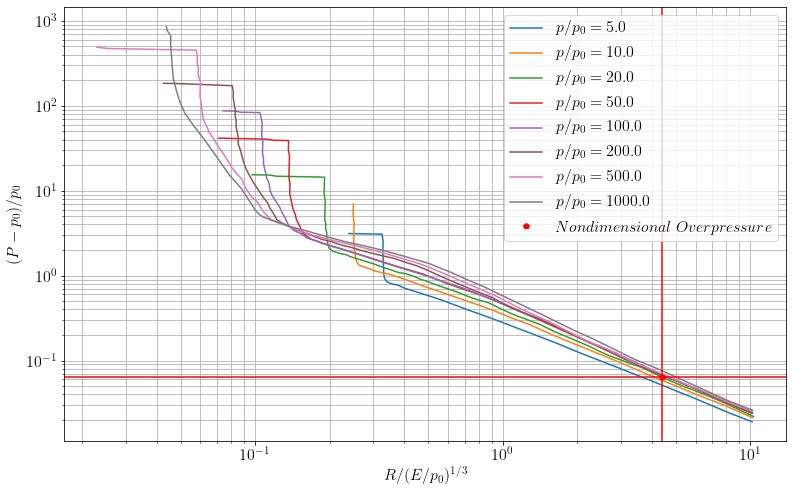

In [97]:
# Get an empty figure
fig1 = plt.figure(figsize = [w,h])

# Get the axes instance at 1st location in 1x1 grid
ax = fig1.add_subplot(1,1,1)

# Generate the plot
grpd = df_pr.groupby('w').apply(lambda x: x.sort_values('z')) # Group by 'w' then sort by 'z'
for name in grpd['z'].unique(): # Iterate through grouped values of z and plot
    plt.loglog(df_pr[df_pr.z==name].R.values, df_pr[df_pr.z==name].P.values, label = name);
plt.plot(sd_r_horz,pr,'rp', label = '$Nondimensional\:Overpressure$');
plt.legend();
plt.axhline(y=pr, color='r', linestyle='-')
plt.axvline(x=sd_r_horz, color='r', linestyle='-')
#plt.text(sd_r_horz, pv/2, '$\left({{{}}},{{{}}}\right)$'.format([sd_r_horz,pv]), ha='right', va='center')

# Set labels for x and y axis
ax.set_xlabel('$R/(E/p_0)^{1/3}$');
ax.set_ylabel('$(P-p_0)/p_0$');
ax.grid(True, which='both')

# Display the figure
plt.show();

In [85]:
ir5 = pd.read_csv('bleve_impulse_curves/ip1_p0_5.csv'); ir5['z'] = r'$p/p_0=5.0$'; ir5['w'] = 5.0
ir10 = pd.read_csv('bleve_impulse_curves/ip1_p0_10.csv'); ir10['z'] = r'$p/p_0=10.0$'; ir10['w'] = 10.0
ir20 = pd.read_csv('bleve_impulse_curves/ip1_p0_20.csv'); ir20['z'] = r'$p/p_0=20.0$'; ir20['w'] = 20.0
ir50 = pd.read_csv('bleve_impulse_curves/ip1_p0_50.csv'); ir50['z'] = r'$p/p_0=50.0$'; ir50['w'] = 50.0
ir100 = pd.read_csv('bleve_impulse_curves/ip1_p0_100.csv'); ir100['z'] = r'$p/p_0=100.0$'; ir100['w'] = 100.0
ir200 = pd.read_csv('bleve_impulse_curves/ip1_p0_200.csv'); ir200['z'] = r'$p/p_0=200.0$'; ir200['w'] = 200.0
ir500 = pd.read_csv('bleve_impulse_curves/ip1_p0_500.csv'); ir500['z'] = r'$p/p_0=500.0$'; ir500['w'] = 500.0
ir1000 = pd.read_csv('bleve_impulse_curves/ip1_p0_1000.csv'); ir1000['z'] = r'$p/p_0=1000.0$'; ir1000['w'] = 1000.0
frame = [ir5, ir10, ir20, ir50, ir100, ir200, ir500, ir1000]
df_ir = pd.concat(frame, sort=True)
df_ir.head()

,I,R,w,z
0,1.098722,0.009641,5.0,$p/p_0=5.0$
1,1.110627,0.012128,5.0,$p/p_0=5.0$
2,1.098565,0.016701,5.0,$p/p_0=5.0$
3,1.088441,0.021905,5.0,$p/p_0=5.0$
4,1.078667,0.028533,5.0,$p/p_0=5.0$


In [86]:
#on a grid in [2, 18]x[0, 10] which was the axes of the
#original paper. The imaginary numbers 200j will break
#the grid into 200 equal spaces.

grid_x, grid_y = np.mgrid[0:10:200j, 0:1000:200j]

#we know the x,y,z values from the original plot image 

points = df_ir[['R','I']].values
values = df_ir['w'].values

points_df_ir = df_ir[['R','w']].values
values_df_ir = df_ir['I'].values

#The cubic method of griddata was used for interpolation.  Grid_x and Grid_y
#can be either a matrix of points or a single pair.
grid_z2_ir = griddata(points_df_ir, values_df_ir, (grid_x, grid_y), method='cubic')

sd_p_vert = 20
sd_r_horz = 4.4
ir = griddata(points_df_ir, values_df_ir, (sd_r_horz, sd_p_vert), method='cubic')
print("The non-dimensional incident impulse is %8.3f" % (ir))

The non-dimensional incident impulse is    0.013


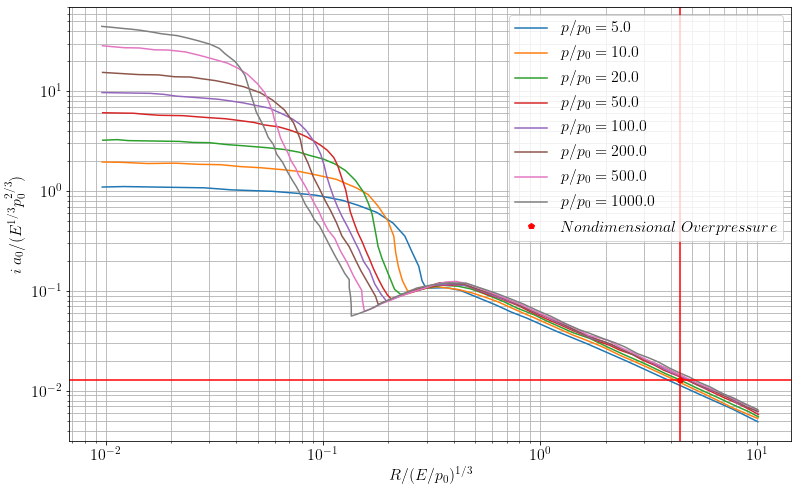

In [99]:
# Get an empty figure
fig2 = plt.figure(figsize = [w,h])

# Get the axes instance at 1st location in 1x1 grid
ax = fig2.add_subplot(1,1,1)

# Generate the plot
grpd = df_ir.groupby('w').apply(lambda x: x.sort_values('z')) # Group by 'w' then sort by 'z'
for name in grpd['z'].unique(): # Iterate through grouped values of z and plot
    plt.loglog(df_ir[df_ir.z==name].R.values, df_ir[df_ir.z==name].I.values, label = name);
plt.plot(sd_r_horz,ir,'rp', label = '$Nondimensional\:Overpressure$');
plt.legend();
plt.axhline(y=ir, color='r', linestyle='-')
plt.axvline(x=sd_r_horz, color='r', linestyle='-')

# Set labels for x and y axis
ax.set_xlabel('$R/(E/p_0)^{1/3}$');
ax.set_ylabel('$i\:a_0/(E^{1/3}p_0^{2/3})$');
ax.grid(True, which='both')

# Display the figure
plt.show();

In [88]:
p_incident = pr*p_atm
print("The incident overpressure is %8.2f Pa (%8.2f psi)" % (p_incident, p_incident*0.000145038))

The incident overpressure is  6488.53 Pa (    0.94 psi)


In [89]:
i_s = (ir*((p_atm)**(2/3))*(E_extot*1000)**(1/3))/a0
print("The incident impulse is %8.2f Pa-s (%8.2f psi-s)" % (i_s, i_s*0.000145038))

The incident impulse is    86.31 Pa-s (    0.01 psi-s)


## Nondimensional Side-on Pressure and Impulse
The nondimenstional side-on pressure can be calculated from Figure X and gives a $\bar{P_s} = 0.064$ for an $\bar{R}=4.4$ and a $p/p_0 = 19.12$.  The nondimensional side-on impulse can be calculated from Figure Y and gives a $\bar{i_s} = 0.013$ for an $\bar{R}=4.4$ and a $p/p_0 = 19.12$.

The side-on pressure and impulse can be calculated from the following:

$$\bar{P_s} - p_0 = (0.064)(101.325\:kPa) = 6.5\:kPa$$
$$i_s = \frac{(0.013)(101325\:kPa)^{2/3}(1160.9E6\:J)^{1/3}}{340\:m/s}= 86.31\:Pa {\text -} s$$
      